# CS229, Fall 2017
## Problem Set 1
### Regression for denoising quasar spectra

#### (a)
**A little to say about LWR and (non-)parametric algorithm**  
* For locally weighted regression, different traning examples have different weight when calculating the cost function. A reasonable way to choose the weight is to make examples that are close to the query point have higher weights.  
* (Non-)Parametric algorithm. Paramedic algorithm is some set of algorithms that are completely determined by parameters. Also, we know the function form of our probability distribution in advanced. So when we finish our training, we can throw away all our training examples. But for non-parametric algorithm, prediction is also based on training examples and we do not know the function form of our distribution. LWR algorithm here is a typical non-parametric algorithm.

##### (i)
Let X be the matrix of the input data where every row represents one training data, so we have:
$$X\theta=\hat{y}$$
where $\hat{y}$ is our prediction.  
Also, if we let $z=\hat{y}-y$. It is not hard to see we have
$$z^{(i)}=\theta^{\mathrm T}x^{(i)}-y^{(i)}$$
Let diagonal matrix W be:
\begin{align*}
w^{(i,j)}=\left\{
\begin{array}{cc}
w^{(i)}&(i=j)\\
0&otherwise
\end{array}
\right.
\end{align*}
It is not hard to verify that:
$$J(\theta)=(X\theta-y)^{\mathrm T}W(X\theta-y)$$

##### (ii)
The derivative of $J(\theta)$ is given by:
\begin{align*}
\nabla_{\theta}J(\theta)=2X^{\mathrm T}W(X\theta-y)
\end{align*}
Let $\nabla_{\theta}J(\theta)=0$, we then have:
$$\theta=(X^{\mathrm T}WX)^{-1}X^{\mathrm T}Wy$$
So, the normal equation of this weighted setting is:
$$X^{\mathrm T}WX\theta=X^{\mathrm T}Wy$$
And the new value of $\theta$ that minimizes $J(\theta)$ is given by:
$$\theta=(X^{\mathrm T}WX)^{-1}X^{\mathrm T}Wy$$

##### (iii)
The log-likelihood is:
$$\ell(\theta)=\sum_i^m\ln\bigg(\frac{1}{\sqrt{2\pi}\sigma^{(i)}}\bigg)+\frac{(y^{(i)}-\theta^{\mathrm T}x^{(i)})^2}{2(\sigma^{(i)})^2}$$
So maximazing $\ell(\theta)$ with respect to $\theta$ is the same as maximizing:
$$\sum_i^m\frac{(y^{(i)}-\theta^{\mathrm T}x^{(i)})^2}{2(\sigma^{(i)})^2}$$
And is the same as minimizing:
$$\sum_i^m-\frac{1}{2(\sigma^{(i)})^2}(\theta^{\mathrm T}x^{(i)}-y^{(i)})^2$$
which is clearly a weighted linear regression probelm with $w^{(i)}=-\frac{1}{2(\sigma^{(i)})^2}$

#### (b)
Visualizing the data

##### (i)
The normal equation is:
$$\theta=(X^{\mathrm T}X)^{-1}X^{\mathrm T}y$$
Remember we have to include the intercept term!

Text(0, 0.5, 'Flux')

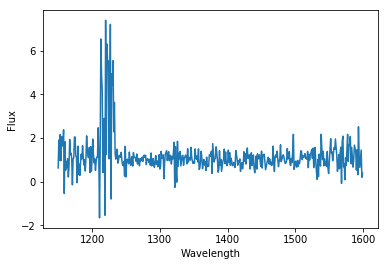

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in the first row
data = np.array(pd.read_csv('./data/quasar_train.csv', nrows=2, skiprows=0, header=None))
X = data[0, :].T
y = data[1, :].T

# Try to plot the raw data
plt.plot(X, y)
plt.xlabel('Wavelength')
plt.ylabel('Flux')

In [45]:
# Apply the normal equation
train_X = np.r_[np.ones((1, X.shape[0])), X.reshape(1, X.shape[0])].T
theta = np.linalg.inv(train_X.T @ train_X) @ train_X.T @ y
print(theta)

[ 2.51339906e+00 -9.81122145e-04]


Text(0, 0.5, 'Flux')

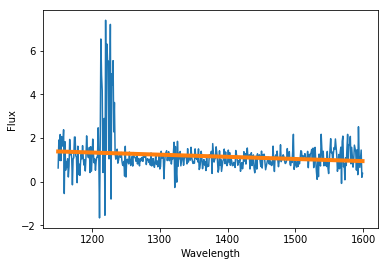

In [46]:
# Plot the result resulting straight line
plt.plot(X, y)
plt.plot(X, train_X @ theta, linewidth=4)
plt.xlabel('Wavelength')
plt.ylabel('Flux')

##### (ii)
Implement the LWR using the normal equation.  
The normal equation of LWR is:
$$\theta=(X^{\mathrm T}WX)^{-1}X^{\mathrm T}Wy$$

In [47]:
def normal_equation_LWR(X, y, x, tau = 5):
    '''
    @return: corresponding predicted y
    '''
    W = np.diag(np.exp(-((x-X)[:, 1] ** 2) / (2 * tau ** 2)))
    theta = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y
    return theta.T @ x, theta


predict_y = np.zeros(X.shape[0])
count = 0
for i in train_X:
    predict_y[count], _ = normal_equation_LWR(train_X, y, i)
    count = count + 1
print('Finish!')

Finish!


**Remember! Always include a intercept term!**  
**But when calculating the weights, we don't use the intercept term**

Text(0, 0.5, 'Flux')

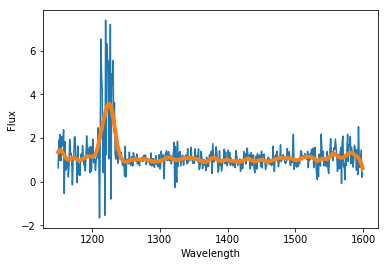

In [48]:
# Plot the result resulting curve line
plt.plot(X, y)
plt.plot(X, predict_y, linewidth=4)
plt.xlabel('Wavelength')
plt.ylabel('Flux')

##### (iii)
Let's try with $\tau=1,10,100,1000$

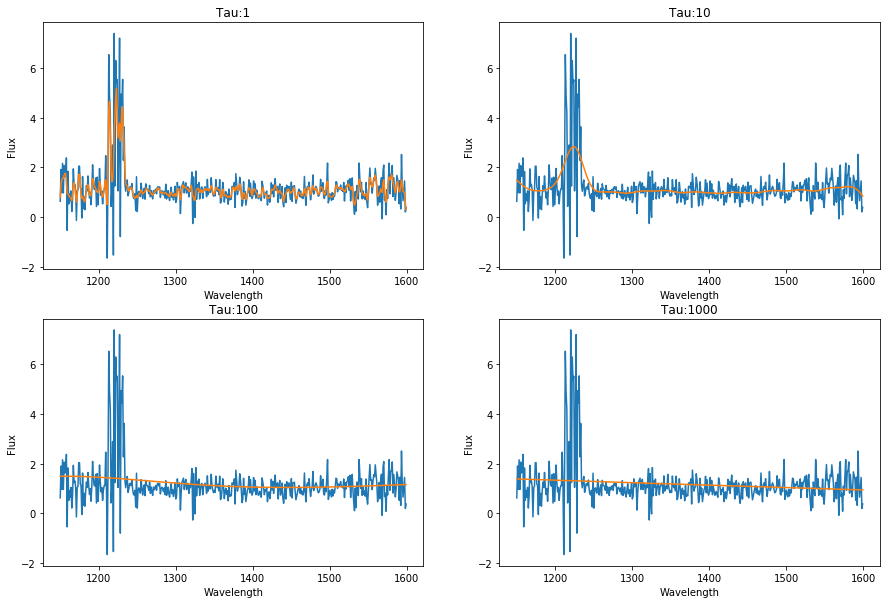

In [49]:
taus = [1, 10, 100, 1000]
_, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()
predict_y = np.zeros(X.shape[0])
for i, tau in enumerate(taus):
    count = 0
    for j in train_X:
        predict_y[count], _ = normal_equation_LWR(train_X, y, j, tau=tau)
        count = count + 1
    
    axe = axes[i]
    axe.plot(X, y)
    axe.plot(X, predict_y)
    axe.set_title('Tau:{0}'.format(tau))
    axe.set_xlabel('Wavelength')
    axe.set_ylabel('Flux')

It is clear that, as the value of $\tau$ increases, the line we fit tends to be more straight, since the weights tends to be uniform.

#### (c)
##### (i)
Smooth the data using weighted linear regression with $\tau=5$

In [50]:
#load all data in
wavelength = np.array(pd.read_csv('./data/quasar_test.csv', header=None, nrows=1)).T
train_data_all = np.array(pd.read_csv('./data/quasar_train.csv'))
test_data_all = np.array(pd.read_csv('./data/quasar_test.csv'))
num_train = train_data_all.shape[0]
num_test = test_data_all.shape[0]
print('wavelength: ' + str(wavelength.shape))
print('train data: ' + str(train_data_all.shape))
print('test data: ' + str(test_data_all.shape))

# stack the data together
temp_data = np.vstack((train_data_all, test_data_all))
print(temp_data)
print(temp_data.shape)
# add an extra column at the begining of array 'wavelength'
wavelength = np.hstack((np.ones((wavelength.shape[0], 1)), wavelength))
print(wavelength.shape)

wavelength: (450, 1)
train data: (200, 450)
test data: (50, 450)
[[ 0.629  1.91   0.976 ...  1.45   0.203  0.382]
 [-0.161  1.83   0.609 ...  1.439  0.767 -0.552]
 [-0.085 -1.304  0.691 ...  1.623  1.202  0.924]
 ...
 [ 0.54   0.962  1.96  ...  1.78   0.873  0.467]
 [-0.038  0.618  0.317 ...  0.543  1.77   0.244]
 [ 0.873 -0.627 -0.843 ...  1.84   0.831 -0.44 ]]
(250, 450)
(450, 2)


In [51]:
# Apply weighted linear regression
smooth_data = np.zeros(temp_data.shape)
thetas = []
for sample_index in range(0, temp_data.shape[0]):
    for wave_index, wave in enumerate(wavelength):
        smooth_data[sample_index][wave_index], theta = normal_equation_LWR(
            wavelength, temp_data[sample_index], wave)
        thetas.append(theta)

print(smooth_data)

[[ 1.35457751  1.411428    1.44418291 ...  0.83468706  0.73537353
   0.61880777]
 [ 0.8630299   0.93499234  0.98748083 ...  0.88094242  0.7530859
   0.58686922]
 [-0.54199083 -0.3879195  -0.23759803 ...  1.1474556   1.18788252
   1.22661737]
 ...
 [ 1.06527855  1.1115778   1.15129278 ...  1.21617739  1.16312832
   1.09094561]
 [ 0.31520383  0.34762668  0.37682221 ...  0.77179692  0.71080766
   0.65123867]
 [-0.40702821 -0.34292857 -0.24749643 ...  1.19066817  1.04953362
   0.86078986]]


In [52]:
# Put smoothed data back
train_data_all = np.array(smooth_data[0:num_train, :])
test_data_all = np.array(smooth_data[num_train:, :])
print(train_data_all.shape)
print(test_data_all.shape)

(200, 450)
(50, 450)


##### (ii)
Here, we use the absorbed $f_{\mathrm{right}}$ to predict the unabsorbed $f_{\mathrm{left}}$. According to the question, the threshold between $f_{\mathrm{right}}$ and $f_{\mathrm{right}}$ is $\lambda=1300$

In [53]:
WAVE_RIGHT_THRESHOLD = 1300
WAVE_LEFT_THRESHOLD = 1200
WAVE_START = 1150
WAVE_END = 1599
LEFT_END = WAVE_LEFT_THRESHOLD - WAVE_START
RIGHT_START = WAVE_RIGHT_THRESHOLD - WAVE_START

We now first implement the function that calculates metric d between two spectra
$$d(f_1,f_2)=\sum_i(f_1(\lambda_i)-f_2(\lambda_i))^2$$

In [54]:
def cal_metric_d(spectra_a, spectra_b):
    '''
    @return: the metric d defined as above
    '''
    a_minus_b = spectra_a - spectra_b
    return a_minus_b @ a_minus_b

Next, we implement the function that find the $\mathrm{neighb}_k(f_{\mathrm {right}})$

In [55]:
import heapq

# make result_d a global var such that we don't need to recalculate later
result_d = np.zeros(num_train)


def find_k_neigh(spectra_new, spectra_training_set, k=3):
    '''
    @param 'spectra_new': the input spectra
    @param 'spectra_training_set': a matrix, each row represents the entire spectrum of a spectra
    @return: a list of k indices and 'h', the maximum value of all d's
    '''
    for i in range(0, num_train):
        spectra_new_right = spectra_new[RIGHT_START:-1]
        spectra_training_right = spectra_training_set[i][RIGHT_START:-1]
        result_d[i] = cal_metric_d(spectra_new_right, spectra_training_right)
    return heapq.nsmallest(k, range(len(result_d)), result_d.take), np.max(result_d)

Then, we implement the $\mathrm{ker}(t)=\max\{1-t,0\}$

In [56]:
def ker(t):
    return (1 - t) if ((1-t) > 0) else 0

Now, we can finally try to implement the estimated function

In [57]:
def cal_estimated(spectra_new, spectra_training_set, lam):
    '''
    @param 'lam': lam will be in the set {1150, ..., 1159}
    @return: the estimated value at x = lam
    '''
    k_indices, h = find_k_neigh(spectra_new, spectra_training_set, k=3)
    spectra_k_neigh_left = np.take(spectra_training_set, k_indices, axis=0)[:, lam - WAVE_START]
    result_ker = np.zeros(spectra_k_neigh_left.shape[0])
    for i in range(len(k_indices)):
        result_ker[i] = ker(result_d[k_indices[i]] / h)
    return np.sum(result_ker @ spectra_k_neigh_left) / np.sum(result_ker)

Let's now take the first example in the training set as an example

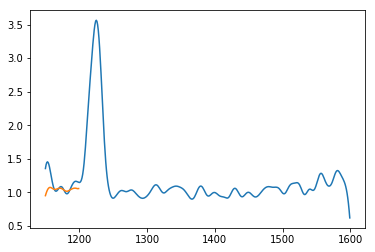

In [58]:
predict_data = np.zeros(LEFT_END)
for i in range(LEFT_END):
    predict_data[i] = cal_estimated(
        train_data_all[0], train_data_all, lam=WAVE_START + i)
plt.plot(wavelength[:, 1], train_data_all[0])
plt.plot(wavelength[:LEFT_END, 1], predict_data)

Everything seems just fine, let's now using all training data to do the prediction and calculate the average training error 

In [59]:
def predict_all(data_all):
    predict_data = np.zeros((data_all.shape[0], LEFT_END))
    for i in range(data_all.shape[0]):
        for j in range(LEFT_END):
            predict_data[i][j] = cal_estimated(
                data_all[i], train_data_all, lam=WAVE_START + j)
    return predict_data

In [60]:
def cal_error(predict_data, data_all):
    error = np.zeros(predict_data.shape[0])
    for i, data in enumerate(predict_data):
        error[i] = cal_metric_d(data, data_all[i][0:LEFT_END])
    return np.average(error)

In [61]:
predict_data = predict_all(train_data_all)
ave_error = cal_error(predict_data, train_data_all)
print('Average error is: %f'%ave_error)

Average error is: 1.100165


##### (iii)
Now we perform prediction on test set

In [62]:
predict_data = predict_all(test_data_all)
ave_error = cal_error(predict_data, test_data_all)
print('Average error is: %f'%ave_error)

Average error is: 2.958030


Text(0.5, 1.0, 'Example 6')

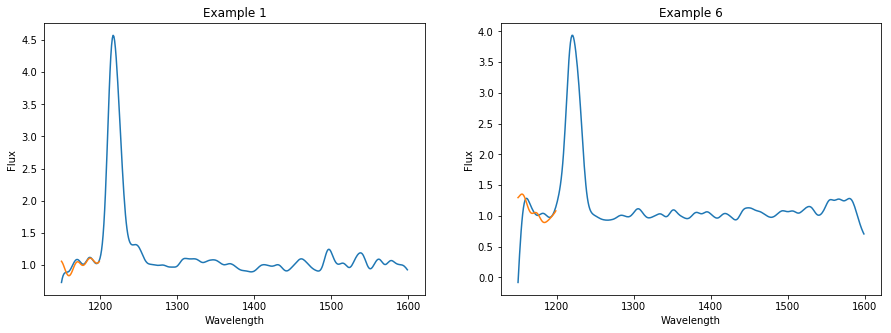

In [63]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(wavelength[:, 1], test_data_all[0])
axes[0].plot(wavelength[:LEFT_END, 1], predict_data[0])
axes[0].set_xlabel('Wavelength')
axes[0].set_ylabel('Flux')
axes[0].set_title('Example 1')

axes[1].plot(wavelength[:, 1], test_data_all[5])
axes[1].plot(wavelength[:LEFT_END, 1], predict_data[5])
axes[1].set_xlabel('Wavelength')
axes[1].set_ylabel('Flux')
axes[1].set_title('Example 6')